In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, classification_report

READ DATASET

In [2]:
df = pd.read_csv(r'D:\PROJECT\Machine learning\Diabetes_Prediction\Data\diabetes_prediction_dataset.csv')

In [3]:
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
70807,Female,60.0,0,0,No Info,41.18,5.8,90,0
97243,Female,21.0,0,0,No Info,45.92,5.7,130,0
88414,Male,47.0,0,0,No Info,31.95,6.0,90,0
82878,Female,17.0,0,0,No Info,25.40,6.0,80,0
648,Male,47.0,0,0,never,27.32,4.8,155,0


Gender is not necessary lets drop it

In [4]:
df = df.drop('gender', axis=1)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   smoking_history      100000 non-null  object 
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 6.1+ MB
None


Check for missing values

In [6]:
df.isnull().sum()

age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Check duplicates

In [7]:
df.duplicated().sum()

6389

In [8]:
df = df.drop_duplicates()
df.shape[0]

93611

In [9]:
df.replace('No Info', float('nan'), inplace=True)

In [21]:
print(df.columns)

Index(['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


Data Visualization

In [23]:
# Define numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

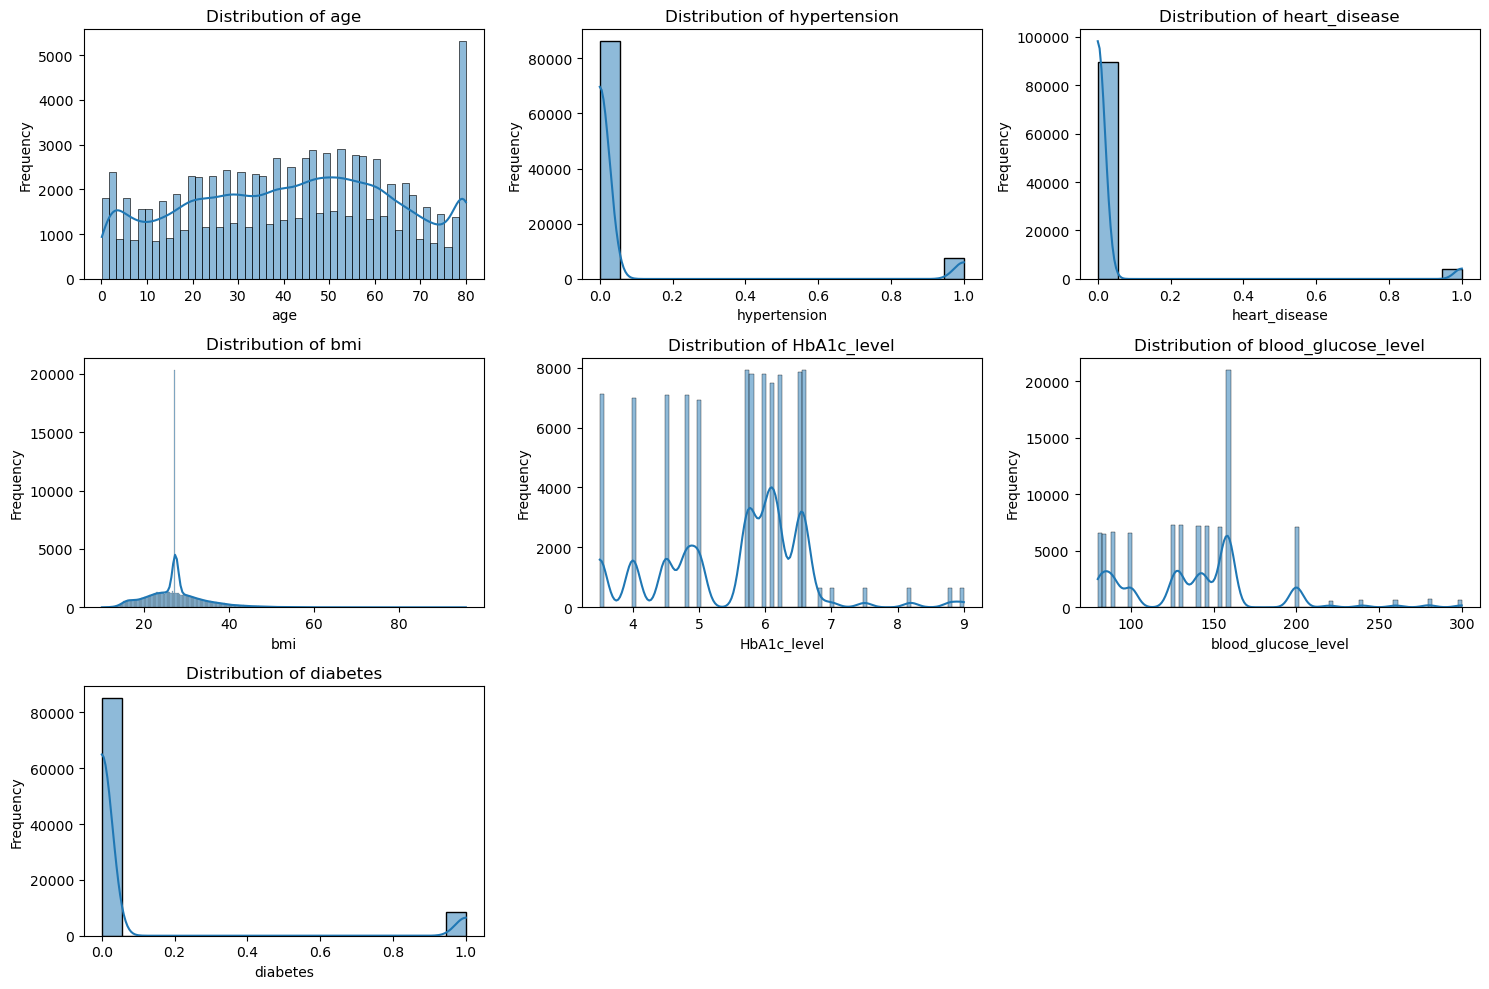

In [24]:
# Distribution plots for each numeric feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

One hot encoding

In [25]:
print(df['smoking_history'].unique())

['never' nan 'current' 'former' 'ever' 'not current']


In [26]:
categorical_cols = ['smoking_history']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [27]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,93611.0,41.833746,22.485157,0.08,24.00,43.00,60.000,80.00
hypertension,93611.0,0.079606,0.270684,0.00,0.00,0.00,0.000,1.00
heart_disease,93611.0,0.041747,0.200012,0.00,0.00,0.00,0.000,1.00
bmi,93611.0,27.322993,6.857632,10.01,23.24,27.32,30.035,95.69
HbA1c_level,93611.0,5.536296,1.075454,3.50,4.80,5.80,6.200,9.00
blood_glucose_level,93611.0,138.331670,41.052424,80.00,100.00,140.00,159.000,300.00
diabetes,93611.0,0.090481,0.286871,0.00,0.00,0.00,0.000,1.00


Check for Class Imbalance and sampling

In [28]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']

In [29]:
target_distribution = y.value_counts(normalize=True) * 100

# Print the percentage distribution
target_distribution

diabetes
0    90.951918
1     9.048082
Name: proportion, dtype: float64

In [30]:
# Assuming 'diabetes' is the target column
target_frequency = df['diabetes'].value_counts()

print(target_frequency)


diabetes
0    85141
1     8470
Name: count, dtype: int64


In [ ]:
# by applying SMOTE

from imblearn.over_sampling import SMOTE

# Example: Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

In [32]:
target_distribution = y_resampled.value_counts(normalize=True) * 100

# Print the percentage distribution
target_distribution

diabetes
0    50.0
1    50.0
Name: proportion, dtype: float64

In [33]:
X_resampled.sample(5)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
69906,41.000000,0,0,21.610000,6.600000,130,False,False,False,False
138784,60.660479,0,0,37.772545,8.867904,140,False,False,True,True
28979,61.000000,0,0,27.320000,6.600000,155,False,False,False,False
73973,80.000000,0,0,23.130000,5.700000,159,False,False,True,False
126102,63.827836,0,0,55.851309,6.004639,260,False,False,True,False


In [34]:
df = pd.concat([X_resampled, y_resampled], axis=1)

In [37]:
numerical_cols = ['age','bmi','HbA1c_level','blood_glucose_level']

z_scores = zscore(df[numerical_cols])

# Set a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 4

# Identify and remove outliers
outliers_mask = (abs(z_scores) > threshold).any(axis=1)
df = df[~outliers_mask]
row=df.shape[0]
print(row)
df=df.dropna()
row=df.shape[0]
row

169817


169817

Slipt Dataset

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [48]:
X_train

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
53624,40.000000,0,0,23.440000,4.000000,85,False,False,True,False
155506,29.860648,0,0,36.034731,5.855741,130,False,True,False,False
112733,60.167503,0,0,43.604388,5.792126,130,False,False,True,False
30282,80.000000,0,1,27.320000,6.600000,126,False,False,False,False
100208,22.000000,0,0,24.170029,7.303094,220,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
119879,80.000000,0,0,31.262390,6.903443,220,False,True,False,False
103694,34.588087,0,0,24.249137,6.323574,260,False,False,False,False
131932,68.277537,0,0,36.387051,6.352862,200,False,False,False,False
146867,64.260311,0,0,27.320000,8.356187,155,False,False,False,True


Training Models

Linear Regression

In [39]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, lr_predictions)
mae = mean_absolute_error(y_test, lr_predictions)
print(f"Linear Regression Mean Squared Error: {mse:.2f}")
print(f"Linear Regression Mean Absolute Error: {mae:.2f}")

Linear Regression Mean Squared Error: 0.10
Linear Regression Mean Absolute Error: 0.26


KNN

In [40]:
# Create a pipeline with the KNN classifier
knn_pipeline = make_pipeline(KNeighborsClassifier())

# Define the parameter grid for GridSearchCV
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],  # You can add more values to test
    'kneighborsclassifier__weights': ['uniform', 'distance'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train,y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Parameters: {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}
Model Accuracy: 0.9512581848078222
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95     16947
           1       0.93      0.98      0.95     17110

    accuracy                           0.95     34057
   macro avg       0.95      0.95      0.95     34057
weighted avg       0.95      0.95      0.95     34057



Decision Tree

In [42]:
# Best Parameters for Decision Tree Classifier
best_params = {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}

# Create and train the Decision Tree Classifier with the specified parameters
dt_classifier = DecisionTreeClassifier(criterion=best_params['criterion'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'],
                                       random_state=0)

dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Model Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", report_dt)

Decision Tree Model Accuracy: 0.9723111254661303
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     16947
           1       0.98      0.97      0.97     17110

    accuracy                           0.97     34057
   macro avg       0.97      0.97      0.97     34057
weighted avg       0.97      0.97      0.97     34057



Random forest classifier

In [44]:
# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Model Accuracy: 0.9307631323956895
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     16947
           1       0.92      0.94      0.93     17110

    accuracy                           0.93     34057
   macro avg       0.93      0.93      0.93     34057
weighted avg       0.93      0.93      0.93     34057



AdaBoost Classifier

In [45]:
best_params = {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}

# Create and train the Decision Tree Classifier with the specified parameters
dt_classifier = DecisionTreeClassifier(criterion=best_params['criterion'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'],
                                       random_state=0)

# Create and train the AdaBoost Classifier using the Decision Tree as base estimator
ada_classifier = AdaBoostClassifier(base_estimator=dt_classifier, n_estimators=50, random_state=0)

# Train the AdaBoost model
ada_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_ada = ada_classifier.predict(X_test)

# Evaluate the AdaBoost model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
report_ada = classification_report(y_test, y_pred_ada)

print("AdaBoost Model Accuracy:", accuracy_ada)
print("AdaBoost Classification Report:\n", report_ada)

c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Model Accuracy: 0.9721055876912236
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     16947
           1       0.97      0.97      0.97     17110

    accuracy                           0.97     34057
   macro avg       0.97      0.97      0.97     34057
weighted avg       0.97      0.97      0.97     34057



In [46]:
from joblib import dump

# Save the trained AdaBoost model to a file
dump(ada_classifier, 'ada_boost_model.joblib')

['ada_boost_model.joblib']